# Advanced usage

In [1]:
# Useful for debugging
# %load_ext autoreload
# %autoreload 2

# Nicer plots
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from pytao import Tao, TaoModel, util, run_tao
from pytao.tao_ctypes.evaluate import evaluate_tao
import os

## Inititialize Tao

In [4]:
INPUT_FILE = os.path.expandvars(
    "$ACC_ROOT_DIR/bmad-doc/tao_examples/csr_beam_tracking/tao.init"
)
assert os.path.exists(os.path.expandvars(INPUT_FILE))

## run_tao

In [5]:
M = run_tao(input_file=INPUT_FILE, ploton=False)
M

## evaluate_tao

In [6]:
res = evaluate_tao(
    settings={"space_charge_com:ds_track_step": 0.001},
    input_file=INPUT_FILE,
    run_commands=["set global track_type=beam"],
    expressions=["lat::orbit.x[FF.PIP02A]", "beam::norm_emit.x[end]"],
    ploton=False,
    archive_csr_wake=True,
    beam_archive_path=".",
)
res

{'lat::orbit.x[FF.PIP02A]': '  0.00000000000000E+00',
 'beam::norm_emit.x[end]': '  9.99826669212015E-07',
 'beam_archive': '/home/runner/work/pytao/pytao/docs/examples/bmad_beam_c3f3c51ed0accf5e6aba8b76f3feab13.h5'}

In [7]:
from pmd_beamphysics import ParticleGroup, particle_paths
from h5py import File

afile = res["beam_archive"]
h5 = File(afile, "r")
ppaths = particle_paths(h5)
ppaths

['/data/00001/particles/',
 '/data/00002/particles/',
 '/data/00003/particles/',
 '/data/00004/particles/']

Note that csr_wake is in here

In [8]:
list(h5)

['csr_wake', 'data', 'expressions', 'input', 'settings']

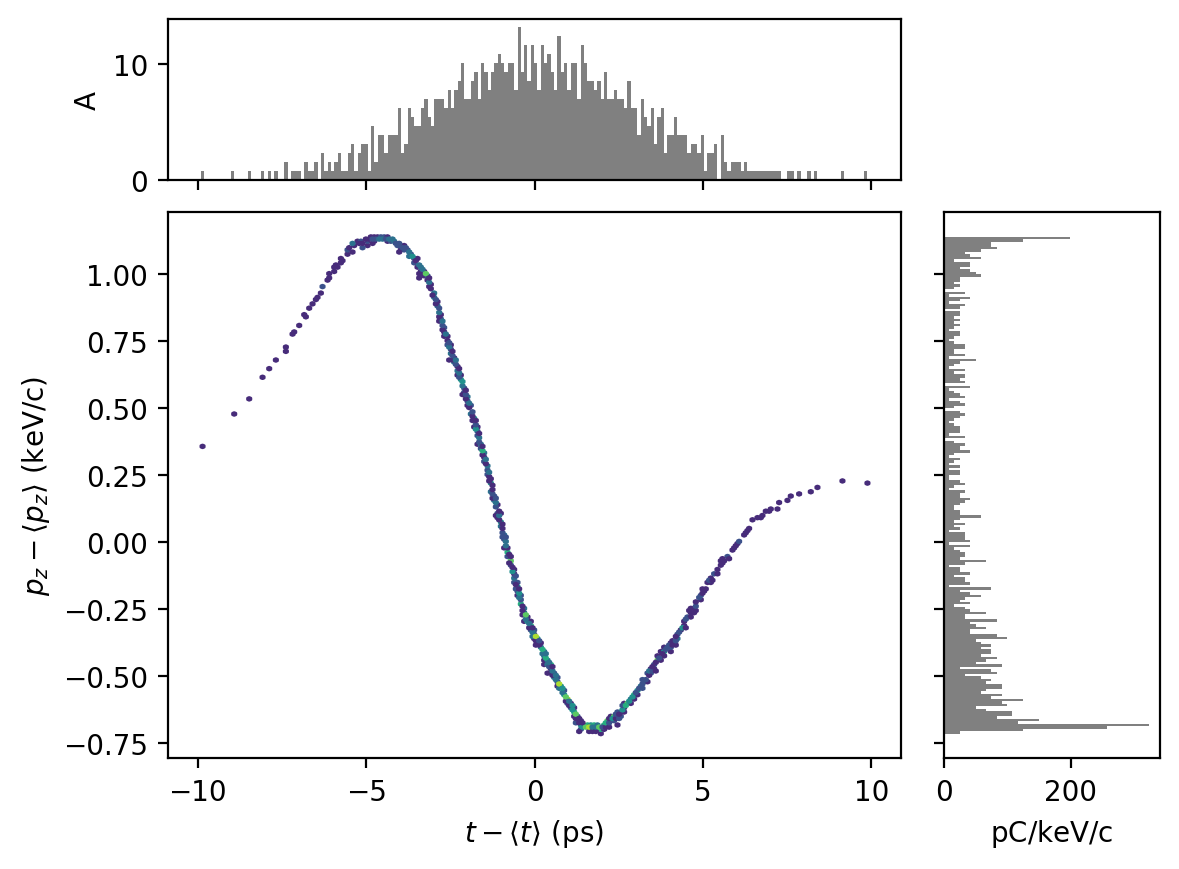

In [9]:
P = ParticleGroup(h5[ppaths[-1]])
P.plot("delta_t", "delta_pz", bins=200)

In [10]:
os.remove(afile)

## evaluate examples

In [11]:
M.evaluate("lat::orbit.x[end]")

'  0.00000000000000E+00'

## csr_wake diagnostic file

In [12]:
from pytao.misc.csr import read_csr_wake_data_h5, process_csr_wake_data
import numpy as np

csr_wake is stored in the HDF5 file

In [13]:
cdat = read_csr_wake_data_h5(h5)

This is the actual data

In [14]:
dat = cdat["3:FF.BEN01"]["data"]
dat.shape

(134, 40, 5)

This will process into a more useful form for data analysis.

In [15]:
pdat = process_csr_wake_data(cdat)

pdat["s_position"]

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
       0.045, 0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053,
       0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.06 , 0.061,
       0.062, 0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 ,
       0.071, 0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079,
       0.08 , 0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088,
       0.089, 0.09 , 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097,
       0.098, 0.099, 0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106,
       0.107, 0.108, 0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115,
       0.116, 0.117, 0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124,
       0.125, 0.126,

In [16]:
from pytao.misc.csr_plot import plot_csr_wake, plot_csr_stats
from pytao.misc.csr import csr_wake_stats_at_step

In [17]:
from ipywidgets import interact


def plot1(step=0):
    plot_csr_wake(pdat, step=step)


nstep = len(pdat["z"])
interact(plot1, step=(0, nstep - 1, 1));

interactive(children=(IntSlider(value=0, description='step', max=449), Output()), _dom_classes=('widget-intera…

Check the s-position for each step

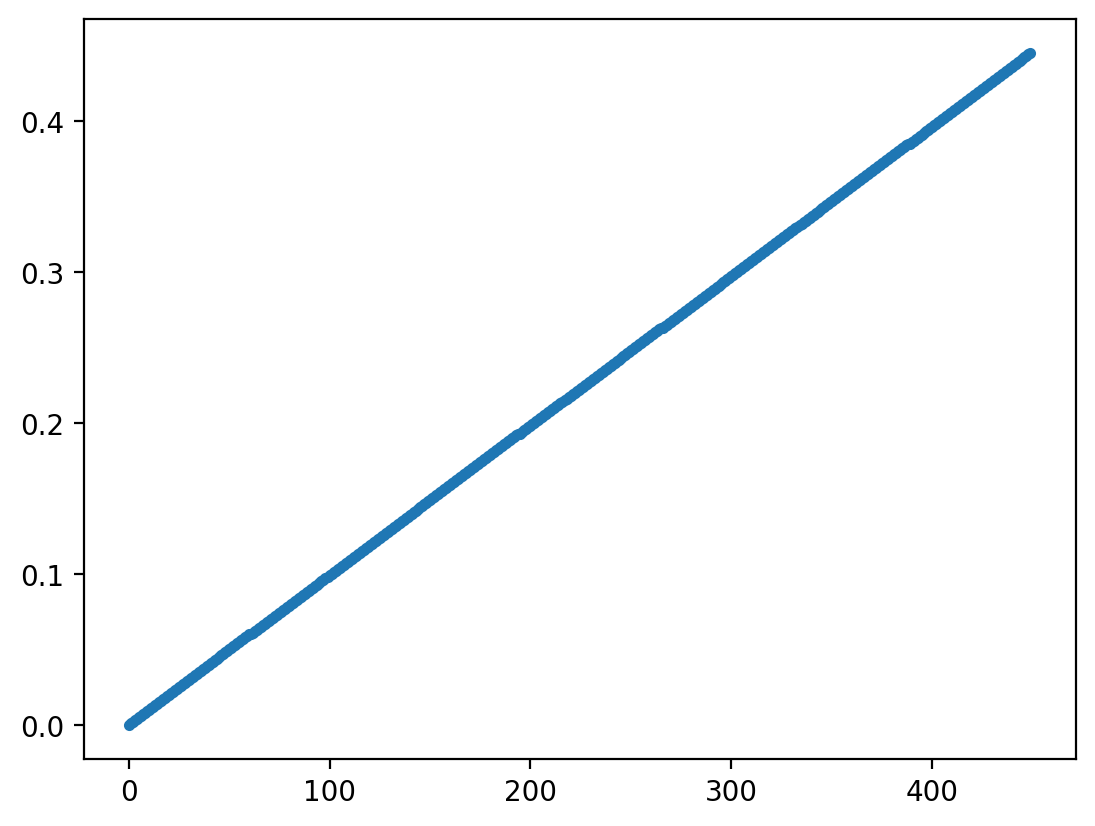

In [18]:
plt.plot(pdat["s_position"], marker=".");

Another convenience plot

(450, 4)


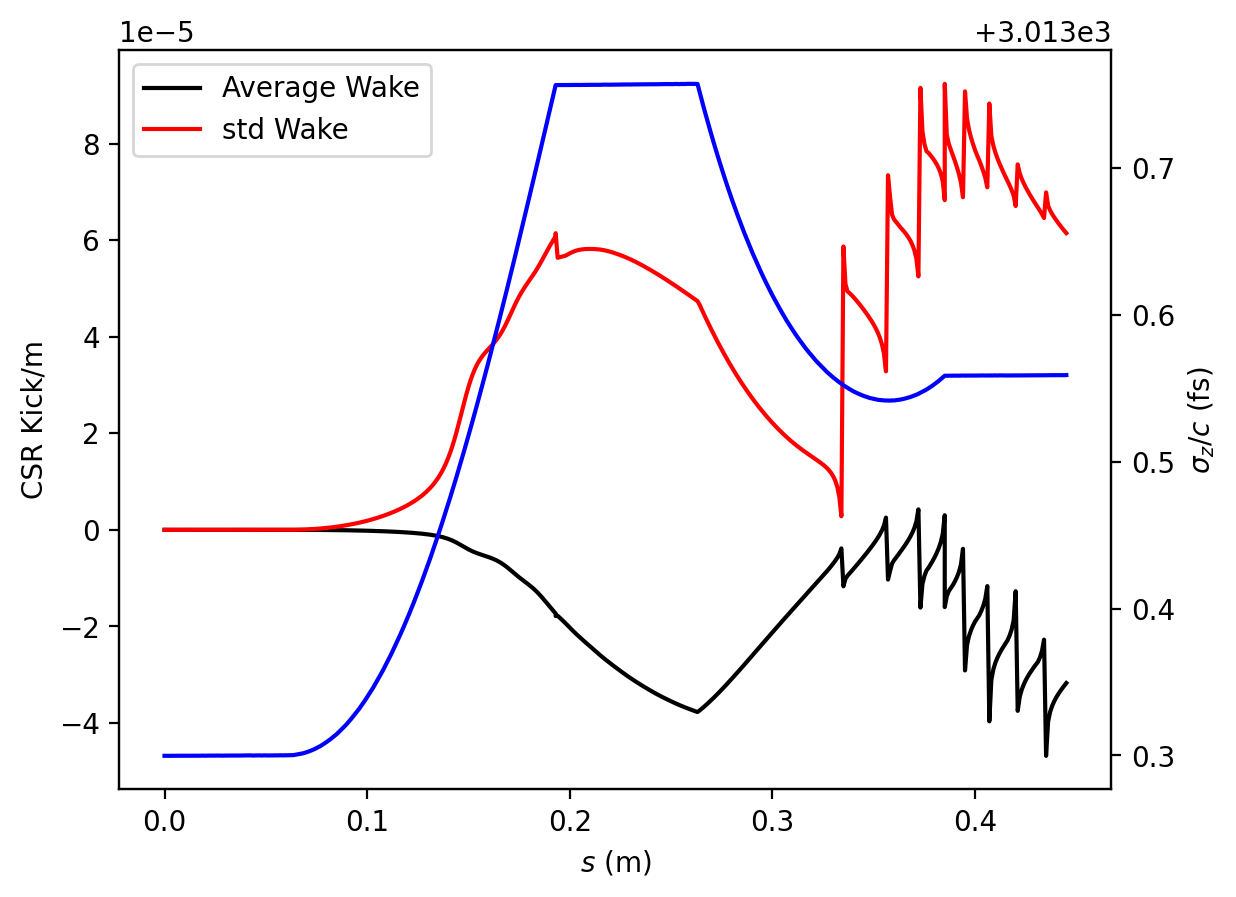

In [19]:
plot_csr_stats(pdat)

Cleanup

In [20]:
os.remove("wake.dat")